***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados=pd.read_csv('dados/dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


*Acrescentei essa célula para vermos as principais estatísticas de dados:* 

In [ ]:
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
sm=788
intervalos=[0,2*sm,5*sm,15*sm,25*sm,dados.Renda.max()+500]
intervalos

[0, 1576, 3940, 11820, 19700, 200500]

### 2º Definir os labels das classes

In [ ]:
labels=['E','D','C','B','A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [ ]:
frequencia=pd.value_counts(pd.cut(x=dados.Renda,
                            bins=intervalos,
                            labels=labels,
                            include_lowest=True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [ ]:
percentuais=pd.value_counts(pd.cut(x=dados.Renda,
                            bins=intervalos,
                            labels=labels,
                            include_lowest=True),normalize=True)*100
percentuais

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
dist_quantitativas=pd.DataFrame({'Frequencia':frequencia,'percentuais':percentuais})
dist_quantitativas.sort_index(ascending=False)

,Frequencia,percentuais
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

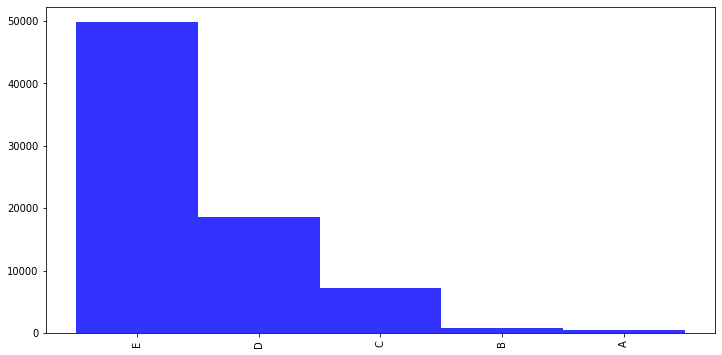

In [ ]:
dist_quantitativas['Frequencia'].plot.bar(width=1,
            color='blue',
            alpha=0.8,
            figsize=(12,6))

> ### Conclusões

Pelo gráfico, pode-se perceber que a maioria dos responsáveis pelo lar pertencem a classe é, e que a medida que o padrão da classe vai aumentando, menor é o número de pessoas daquela classe.

Mostrando assim uma grande desigualdade social.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

Variáveis quantitativas dessa base de dados: Renda, Altura e Anos de Estudo

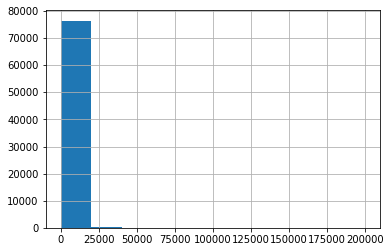

In [ ]:
#Histograma da Renda 


dados['Renda'].hist()

Não podemos perceber nada por esse tipo de gráfico, vamos tratar essa base de dados para quê vejamos somente os salários inferiores a 30000

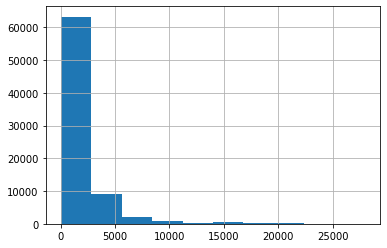

In [ ]:
dados.query("Renda<30000").Renda.hist()

Por esse gráfico fica fácil perceber que estamos lidando com uma variável assimétrica a direita, ou seja, moda< mediana < media 

Vamos fazer um gráfico melhor utilizand o a seaborn:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


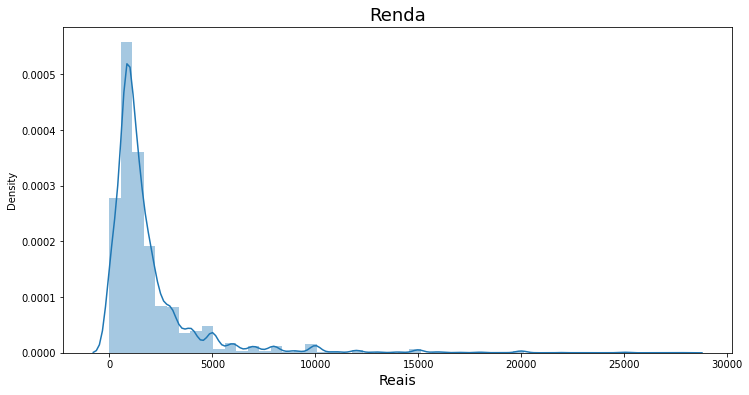

In [ ]:
#Histograma Renda:
ax=sns.distplot(dados.query('Renda<30000').Renda)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('Reais', fontsize=14)
ax.figure.set_size_inches(12,6)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


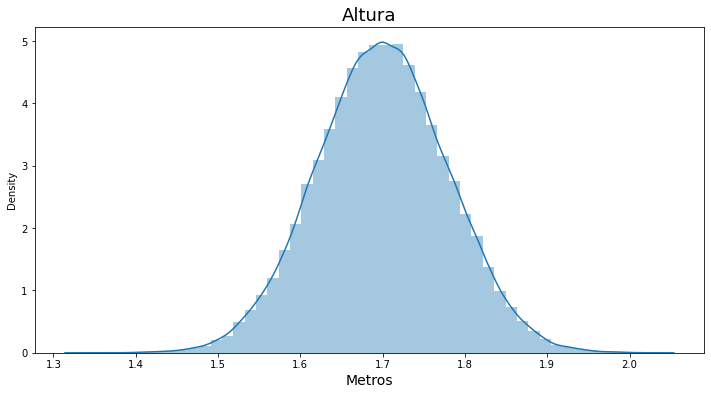

In [ ]:
ax=sns.distplot(dados['Altura'])
ax.set_title('Altura',fontsize=18)
ax.set_xlabel('Metros',fontsize=14)
ax.figure.set_size_inches(12,6)
ax

Vemos aqui que a variável fictícia cancelada pelo professor é totalmente simétrica, onde moda=mediana= media

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


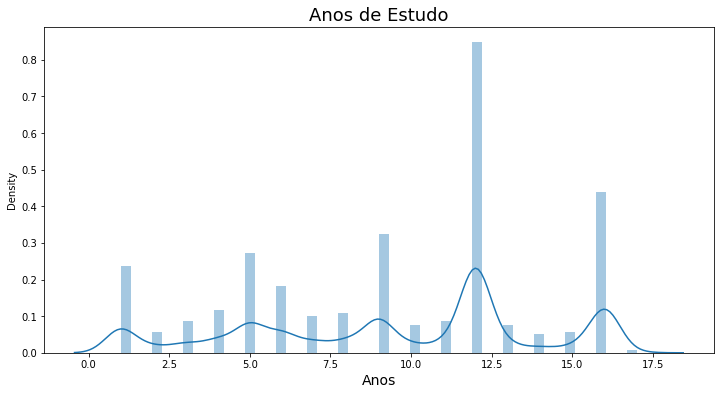

In [ ]:
#Histograma Anos de Estudo
ax=sns.distplot(dados['Anos de Estudo'])
ax.set_title('Anos de Estudo',fontsize=18)
ax.set_xlabel('Anos',fontsize=14)
ax.figure.set_size_inches(12,6)
ax

É dificil perceber por esse gráfico se esses dados são assimétricos a esquerda, assimétricos a direita ou simétricos, por isso, vamos ver qual a media, a moda e a mediana:

In [ ]:
print('A moda é:',dados['Anos de Estudo'].mode())
print('A mediana é:', dados['Anos de Estudo'].median())
print('A media é:',dados['Anos de Estudo'].mean())

A moda é: 0    12
dtype: int64
A mediana é: 11.0
A media é: 9.469664237376367


Como moda> mediana> média, temos que essa variável é assimétrica a esquerda!

> ### Conclusões

Aqui pode-se ver um exemplo de cada tipo de distribuição (assimétrica a esquerda, simétrica e assimétrica a direita)

Além disso, percebe-se a desigualdade social, através da distribuição de Renda.
Considerando que 12 anos de estudo é o tempo necessário para chegar ao ensino médio, percebe-se uma tendencia da população a ir até o primeiro ano do ensino médio. 

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

Isso já foi feito, porém com o valor de 30, refazendo:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


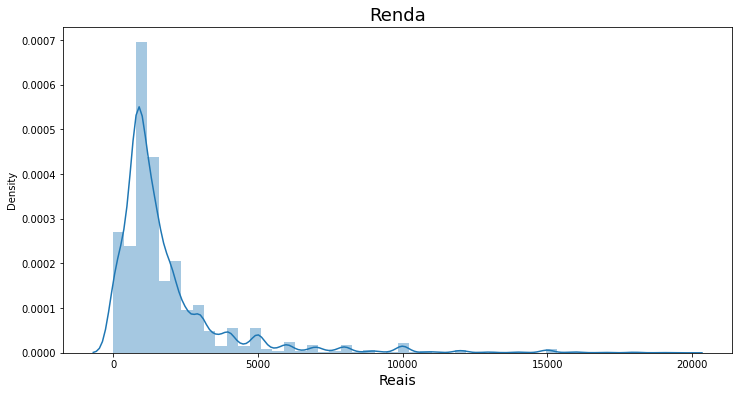

In [ ]:
ax=sns.distplot(dados.query('Renda<20000').Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Renda',fontsize=18)
ax.set_xlabel('Reais',fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
frequencia=pd.crosstab(dados.Sexo,dados.Cor)
frequencia.rename(index=sexo,inplace=True)
frequencia.rename(columns=cor,inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
percentual=pd.crosstab(dados.Sexo,dados.Cor,normalize=True)
percentual.rename(index=sexo,inplace=True)
percentual.rename(columns=cor,inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359


Antes de tirarmos conclusões, vamos fazer um groupby para ver qual a relação entre donos dos lares x sexo 

In [ ]:
verificar=dados.Sexo.value_counts(normalize=True)
verificar.rename(index={0:'Masculino',1:'Feminino'},inplace=True)
verificar

Masculino    0.692998
Feminino     0.307002
Name: Sexo, dtype: float64

> ### Conclusões

Vê-se que 70% dos Lares tem como chefes de família homens, analisando os chefes de família Homens vemos que a grande maioria tende a ser homens brancos 

Já analisando os 30% dos Lares que são comandados por mulheres vemos que Mulheres Pardas são a maioria

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [ ]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [ ]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
dados.Renda.mad()

1526.4951371638058

### Obtenha a variância

In [ ]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [ ]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

O Crosstab já foi feito, agora é obter os valores 

In [ ]:
#Obtendo a Renda Média
renda_mean=pd.crosstab(dados.Sexo,dados.Cor,aggfunc='mean',values=dados.Renda)
renda_mean.rename(index=sexo,inplace=True )
renda_mean.rename(columns=cor,inplace=True)
renda_mean

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [ ]:
#Obtendo a Mediana da Renda 
renda_median=pd.crosstab(dados.Sexo,dados.Cor,aggfunc='mean',values=dados.Renda)
renda_median.rename(index=sexo,inplace=True)
renda_median.rename(columns=cor,inplace=True)
renda_median

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [ ]:
#Obtendo a Renda máxima
renda_max=pd.crosstab(dados.Sexo,dados.Cor,aggfunc='max',values=dados.Renda)
renda_max.rename(index=sexo,inplace=True)
renda_max.rename(columns=cor,inplace=True)
renda_max

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Continuando com a conclusão de cima, temos que a maioria dos lares são comandados por homens, dentro do grupo dos homens, a maioria dos lares são comandados por homens brancos. 

Já para as mulheres, a maioria são mulheres pardas.

Pelas novas medidas obtidas, percebe-se que homens brancos possuem uma renda media,mediana e máxima superior a de mulheres pardas. 


Além disso, percebe-se também que pessoas da cor amarela costumam ter renda média e mediana acima das outras cores.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
renda_desvio_medio_absoluto=pd.crosstab(dados.Sexo,dados.Cor,aggfunc='mad',values=dados.Renda)
renda_desvio_medio_absoluto.rename(index=sexo,columns=cor,inplace=True)
renda_desvio_medio_absoluto

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,798.910889,2261.012346,975.602482,3709.597211,1125.827704
Feminino,3007.892952,1670.967106,705.453357,2549.146322,811.580946


In [ ]:
renda_variancia=pd.crosstab(dados.Sexo,dados.Cor,aggfunc='var',values=dados.Renda)
renda_variancia.rename(index=sexo,columns=cor,inplace=True)
renda_variancia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


In [ ]:
renda_desvio_padrao=pd.crosstab(dados.Sexo,dados.Cor,aggfunc='std',values=dados.Renda)
renda_desvio_padrao.rename(index=sexo,columns=cor,inplace=True)
renda_desvio_padrao

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


> ### Conclusões

Vemos uma grande variação nas rendas dos chefes de casa brasileiros, sendo as menores delas homens indigenas e mulheres pardas ,esse último sendo o grupo predominante entre as mulheres donas de casa, como elas são as que ganham menos em média e mediana e temos uma variação pequena nas rendas, temos que no geral mulheres pardas donas de lares são o grupo que com tende a ganhar pouco. 

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

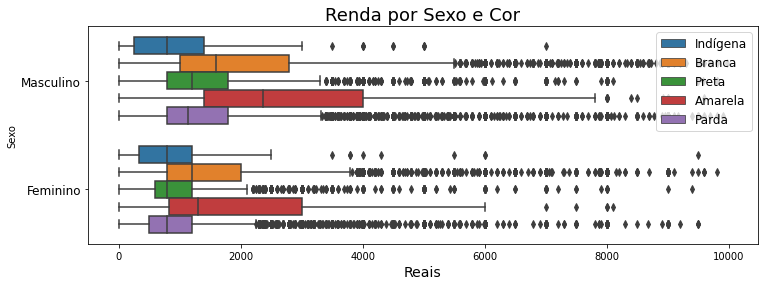

In [ ]:
ax=sns.boxplot(x='Renda',y='Sexo',hue='Cor',data=dados.query('Renda<10000'),orient='h')
ax.figure.set_size_inches(12,4)


handles, _= ax.get_legend_handles_labels()
ax.legend(handles,[key for key in cor.values()],loc='upper right',fontsize=12)

ax.set_yticklabels([key for key in sexo.values()],fontsize=12)

ax.set_title('Renda por Sexo e Cor',fontsize=18)
ax.set_xlabel('Reais',fontsize=14)
ax

> ### Conclusões

Homens tendem a ganhar mais do que mulheres e pessoas amarelas são as que tendem a ganhar mais também. 

Vale destacar que, o grupo que mais ganha são homens amarelos, seguido de mulheres amarelas.

Os grupos que tendem a ganhar menos são mulheres perdas e pardas. 

Além disso, vale destacar o alto número de outliers nos brancos, pretos e pardos.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

stats.percentileofscore(dados.Renda,788,kind='weak')


28.86777719937533

28,87% dos donos de casa ganham um salário mínimo ou menos!

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
dados.Renda.quantile(q=0.99)

15000.0

O valor máximo ganho por 99% dos donos de casa é de R$ 15000,00

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
media_segundo_anos_estudo=pd.crosstab(dados['Anos de Estudo'],dados.Sexo,aggfunc='mean',values=dados.Renda)
media_segundo_anos_estudo.rename(index=anos_de_estudo,columns=sexo,inplace=True)
media_segundo_anos_estudo

Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,799.494638,516.201748
1 ano,895.629047,492.771987
2 anos,931.178986,529.911638
3 anos,1109.203862,546.853916
4 anos,1302.329283,704.279111
5 anos,1338.653218,781.389776
6 anos,1448.875419,833.732824
7 anos,1465.497940,830.751004
8 anos,1639.396667,933.615351


In [ ]:
mediana_segundo_anos_estudo=pd.crosstab(dados['Anos de Estudo'],dados.Sexo,aggfunc='median',values=dados.Renda)
mediana_segundo_anos_estudo.rename(index=anos_de_estudo,columns=sexo,inplace=True)
mediana_segundo_anos_estudo

Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,700,390
1 ano,788,400
2 anos,788,450
3 anos,800,500
4 anos,1000,788
5 anos,1045,788
6 anos,1200,788
7 anos,1200,788
8 anos,1300,800


In [ ]:
desvio_padrao_anos_estudo=pd.crosstab(dados['Anos de Estudo'],dados.Sexo,aggfunc='std',values=dados.Renda)
desvio_padrao_anos_estudo.rename(index=anos_de_estudo,columns=sexo, inplace=True)
desvio_padrao_anos_estudo

Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,1023.904884,639.311534
1 ano,1331.950552,425.291842
2 anos,1435.173827,498.234168
3 anos,2143.800133,424.124446
4 anos,1419.821787,629.553397
5 anos,1484.650587,635.782641
6 anos,1476.628602,574.547028
7 anos,1419.708673,602.038029
8 anos,1515.583715,896.781213


> ### Conclusões

Desses dados 2 fatores são nítidos:

1 -  A tendencia da renda aumentar a medida que os anos de estudo aumentam 

2 - A diferença salarial entre mulheres e homens com o mesmo ano de estudo. 


Além disso percebe-se também uma grande variação salarial entre pessoas que passam muito tempo estudando 
Talvez seria bom saber-se também a profissão de cada dono de casa, dessa maneira, poderiamos ter um desvio padrão menor, ao separar por profissão.

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

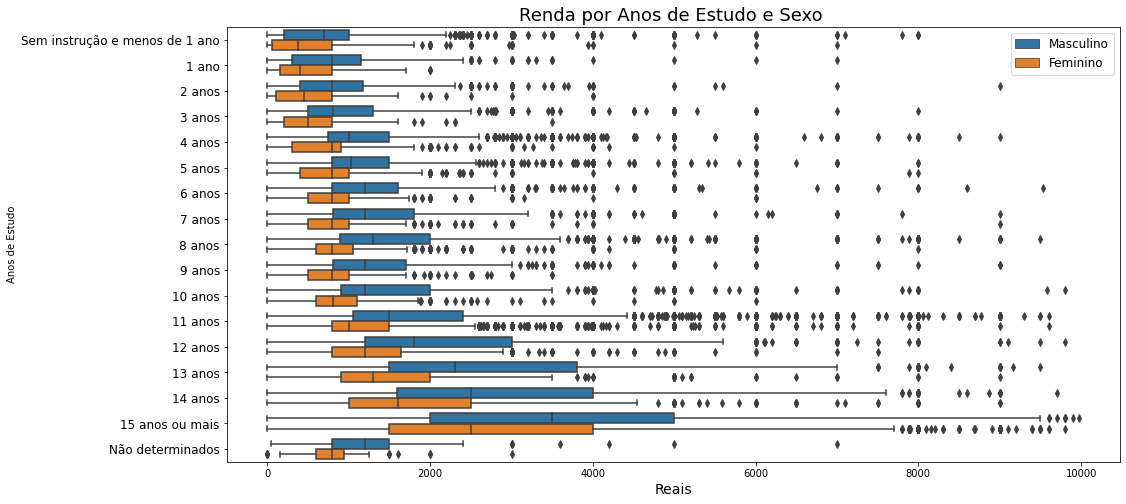

In [ ]:
ax=sns.boxplot(x=dados.query('Renda<10000').Renda,y=dados['Anos de Estudo'],hue=dados.Sexo,orient='h')
ax.figure.set_size_inches(16,8)
ax.set_title('Renda por Anos de Estudo e Sexo ',fontsize=18)
ax.set_xlabel('Reais',fontsize=14)

ax.set_yticklabels([key for key in anos_de_estudo.values()],fontsize=12)

handles, _ =  ax.get_legend_handles_labels()
ax.legend(handles, [key for key in sexo.values()],fontsize=12)

ax

> ### Conclusões

Por esse gráfico percebe-se a diferença salarial entre homens e mulheres, além disso pode-se ver a tendência em aumentar a renda a medida que a escolaridade aumenta.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
dados_por_uf=dados.groupby(['UF']).agg({'Renda':['mean','median','max','std']})
#dados_por_uf.rename(index=uf,columns={'UF','Média','Mediana','Máxima','Desvio Padrão'},inplace=True)
dados_por_uf.rename(index=uf,inplace=True)
dados_por_uf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

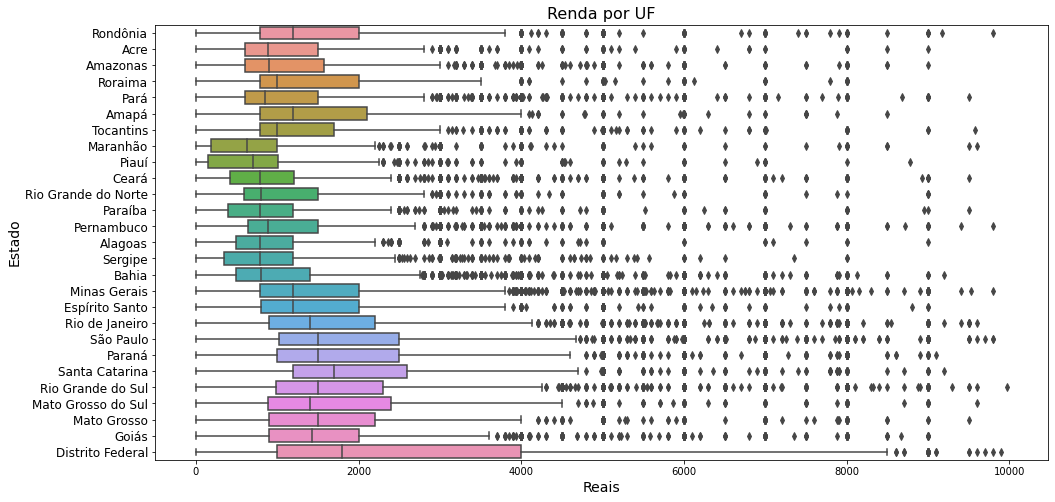

In [ ]:
ax=sns.boxplot(x='Renda',y='UF',data=dados.query('Renda<10000'),orient='h')

ax.figure.set_size_inches(16,8)

ax.set_title('Renda por UF',fontsize=16)

ax.set_ylabel("Estado",fontsize=14)

ax.set_xlabel("Reais",fontsize=14)

ax.set_yticklabels([key for key in uf.values()],fontsize=12)

ax

> ### Conclusões

Pessoas que moram no Distrito Federal tendem a ter uma renda maior,em segundo lugar está São Paulo.

Percebe-se também que Sul e Sudeste são as regiões que possuem maior renda. Enquanto que o Nordeste é a região com menor renda.